<a href="https://colab.research.google.com/github/Mang0725/Business-Report-on-SuperMarket-Sales/blob/main/Business_Report_on_superMarket_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
!pip install pywaffle --quiet
from pywaffle import Waffle
from wordcloud import WordCloud

     |████████████████████████████████| 532kB 4.1MB/s 


In [ ]:
df = pd.read_csv("/content/supermarket_sales - Sheet1.csv")

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

# **FEATURE ENGINEERING**

In [ ]:
df['date'] = pd.to_datetime(df['Date'])
df['date'].dtype
df['date'] = pd.to_datetime(df['date'])
df['day']=(df['date']).dt.day
df['month'] = (df['date']).dt.month
df['year'] = (df['date']).dt.year
del(df["date"])

In [ ]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,month,year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,8,3,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,29,1,2019
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,2,3,2019
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,9,2,2019
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,22,2,2019


In [ ]:
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = (df['Time']).dt.hour
df['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12])

In [ ]:
categorical_columns = [cname for cname in df.columns if df[cname].dtype == "object"]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Date',
 'Payment']

In [ ]:
d=df.describe()
d

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,day,month,year,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,15.256000,1.993000,2019.0,14.910000
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858,8.693563,0.835254,0.0,3.186857
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,1.000000,1.000000,2019.0,10.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,8.000000,1.000000,2019.0,12.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,15.000000,2.000000,2019.0,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,23.000000,3.000000,2019.0,18.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,31.000000,3.000000,2019.0,20.000000


In [ ]:

print('Insights obtained from the dataset are as follows :')
print("1. Mean ratings of an experience in the supermaket =",d.iloc[-5,1])
print("1. Mean unit price of an article in the supermaket = $",d.iloc[0,1])
print("2. Mean cogs obtained from selling the articles    = $",d.iloc[4,1])
print("3. Mean gross margin percentage of articles sold   = $",d.iloc[5,1])
print("4. So mean revenue in dollars of the supermarket   = $",(d.iloc[4,1]/(d.iloc[5,1]-1))+d.iloc[4,1])
print("5. Net mean income per day of the supermarket      = $",((d.iloc[4,1]/(d.iloc[5,1]-1))+d.iloc[4,1])/40)

Insights obtained from the dataset are as follows :
1. Mean ratings of an experience in the supermaket = 1.0
1. Mean unit price of an article in the supermaket = $ 1000.0
2. Mean cogs obtained from selling the articles    = $ 3.0
3. Mean gross margin percentage of articles sold   = $ 5.0
4. So mean revenue in dollars of the supermarket   = $ 3.75
5. Net mean income per day of the supermarket      = $ 0.09375


In [ ]:
print("by analysing Customer Satisfaction level of SuperMarket is ",end=":")
if(d.iloc[-1,1]>5.0):
  print("Good")
else:
  print("poor")  

by analysing Customer Satisfaction level of SuperMarket is :Good


# **DATA VISUALIZATION**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



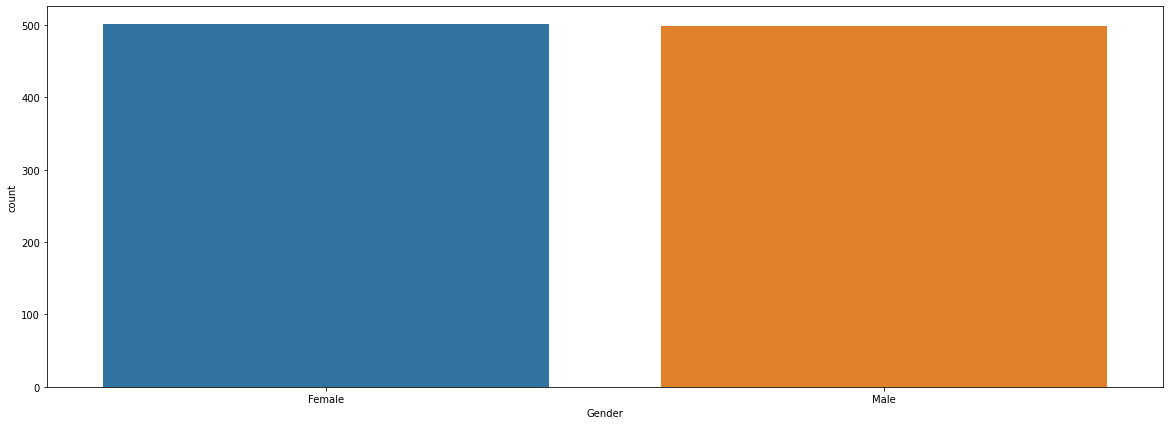

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(df['Gender'])

Text(0.5, 1.0, 'Ratings By Branch')

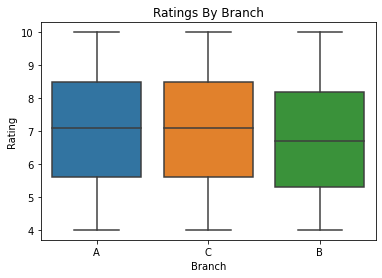

In [ ]:
sns.boxplot(x="Branch",y="Rating",data=df).set_title("Ratings By Branch")

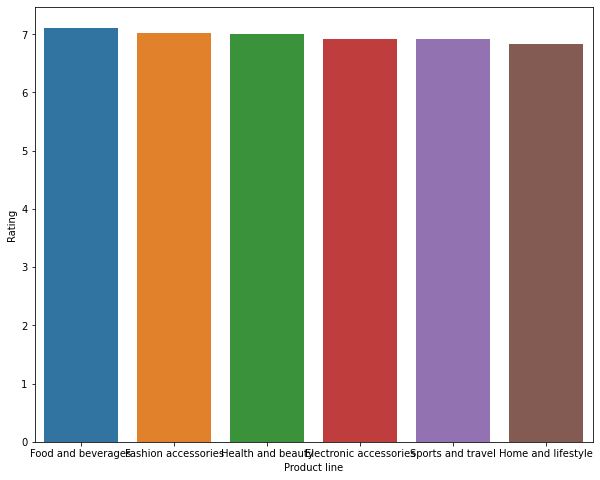

In [ ]:
cat=df[["Product line", "Rating"]].groupby(['Product line'], as_index=False).mean().sort_values(by='Rating', ascending=False)
plt.figure(figsize=(10,8))

sns.barplot(x='Product line', y='Rating', data=cat)

*Negligible Variation of rating*

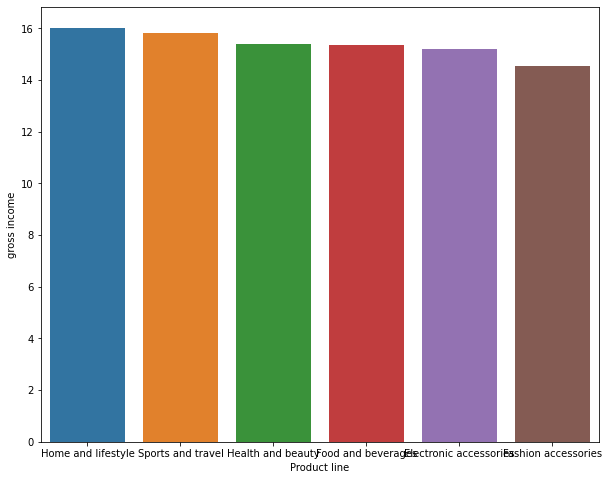

In [ ]:
cat=df[["Product line", "gross income"]].groupby(['Product line'], as_index=False).mean().sort_values(by='gross income', ascending=False)
plt.figure(figsize=(10,8))

sns.barplot(x='Product line', y='gross income', data=cat)

*Gross income is more in Food and bevarages. However,Health and supply need some good caring*

Text(0.5, 1.0, 'Product Sales per Hour')

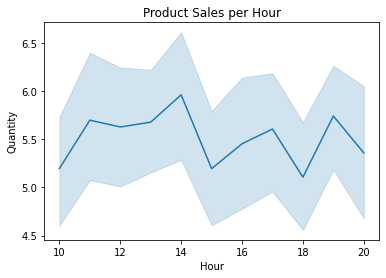

In [ ]:
sns.lineplot(x="Hour", y="Quantity",data = df).set_title("Product Sales per Hour")

Around 2 p.m.(14 hour) peaked showed more quantity is been sold in afternoon

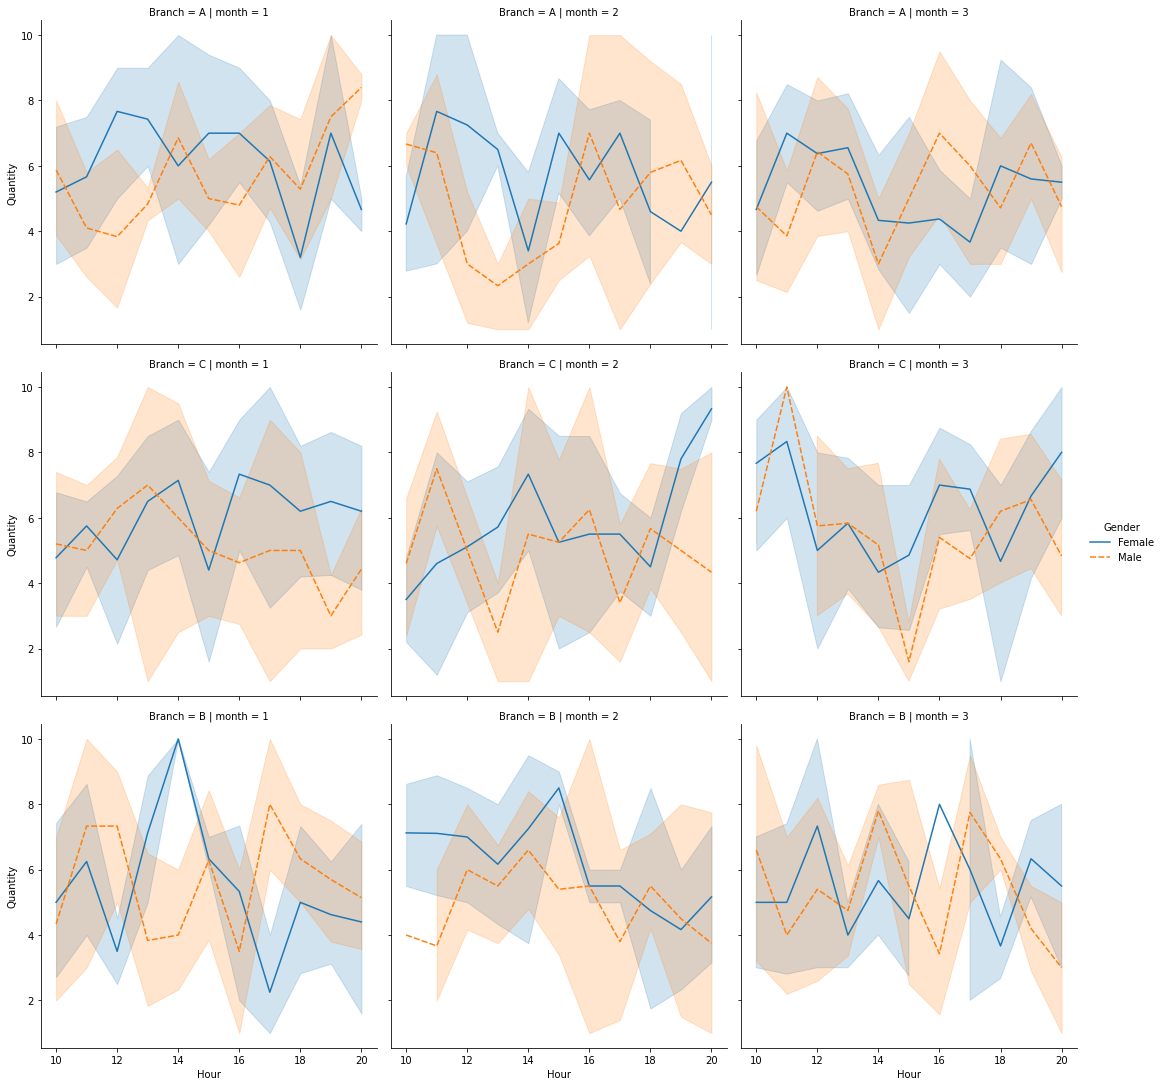

In [ ]:
sns.relplot(x="Hour", y="Quantity" ,col="month" , row='Branch', kind="line",hue="Gender",style='Gender',data=df)

*A detailed plot of every branch's Quantity during the three month of time period presented by females and males*

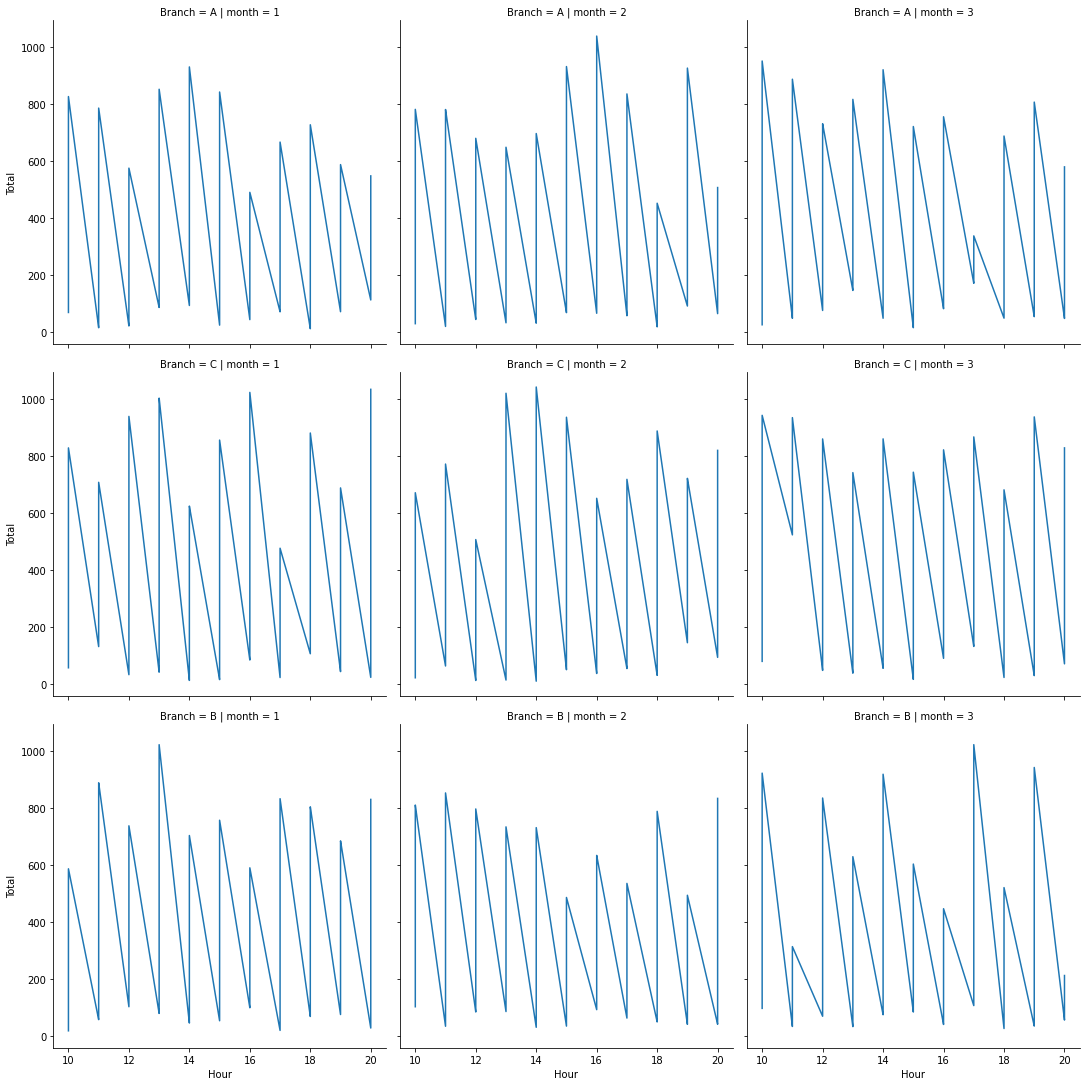

In [ ]:
sns.relplot(x="Hour",  y = 'Total', col= 'month' , row= 'Branch', estimator = None, kind="line", data =df)

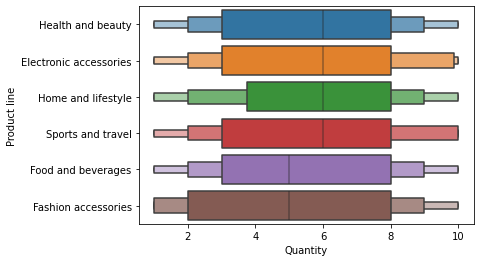

In [ ]:
sns.boxenplot(y='Product line', x="Quantity",data=df)

**Food and bevarges,fashion accesories has less mean quantity whereas we have seen that both of these categories had high rating .so we need to increase our supply**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0.98, 'Most profit gain by branchs')

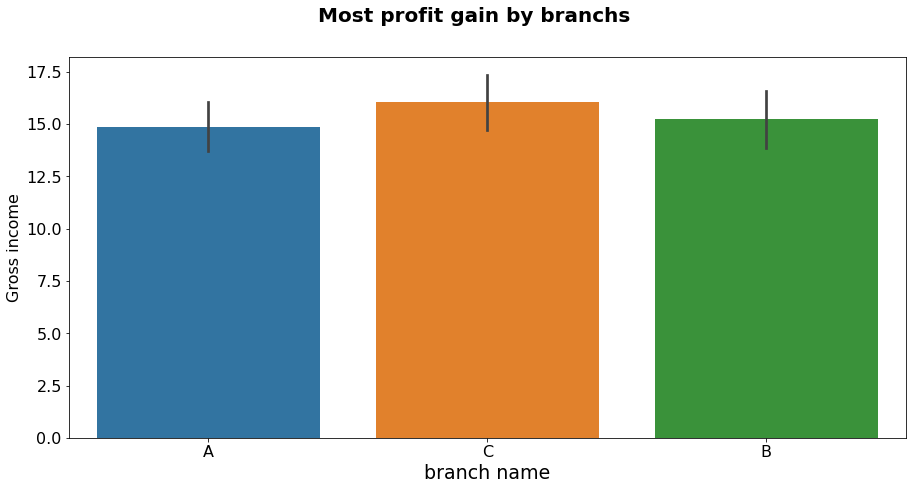

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(df['Branch'],df['gross income'])
plt.xlabel("branch name",fontsize='19')
plt.xticks(fontsize='16')
plt.ylabel('Gross income',fontsize='16')
plt.yticks(fontsize='16')
plt.suptitle("Most profit gain by branchs",fontsize='20',fontweight='bold')

Focus should be on **C** 

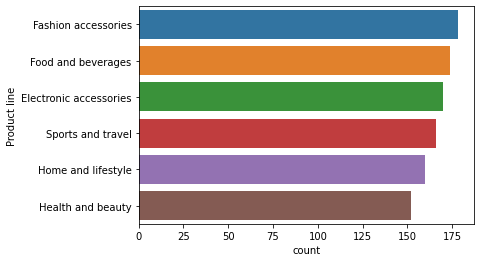

In [ ]:
sns.countplot (y='Product line',data=df,order=df['Product line'].value_counts().index)

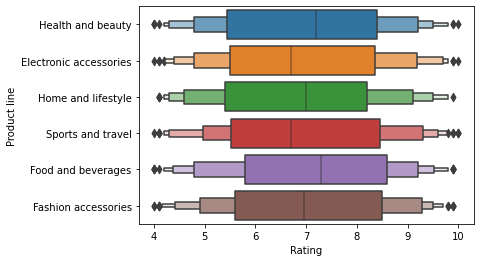

In [ ]:
sns.boxenplot(y='Product line',x='Rating',data=df)

Text(0.5, 1.0, 'Payment Mpode')

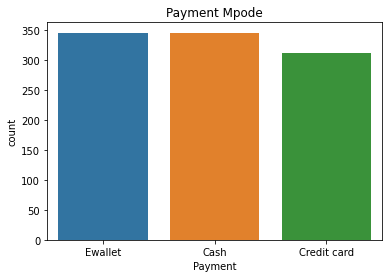

In [ ]:
sns.countplot(x="Payment",data=df).set_title("Payment Mode")

Text(0.5, 1.0, 'Payment Channel By Branch')

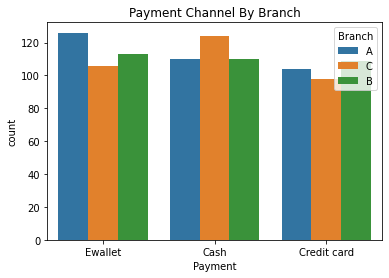

In [ ]:
sns.countplot(x="Payment",hue="Branch",data=df).set_title("Payment Channel By Branch")

# **CUSTOMER ANALYSIS**

Text(0.5, 1.0, 'Customer Type by Branch')

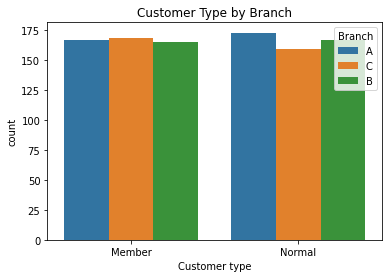

In [ ]:
sns.countplot(x="Customer type",hue="Branch",data=df).set_title("Customer Type by Branch")

In [ ]:
df.groupby(['Customer type']).agg({'Total':sum})

,Total
Customer type,
Member,164223.444
Normal,158743.305


Text(0.5, 1.0, 'Customer Type')

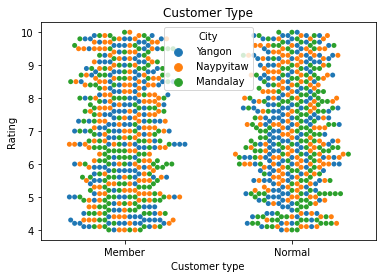

In [ ]:
sns.swarmplot(x="Customer type",  y = "Rating",  hue = "City", data =df).set_title("Customer Type") 

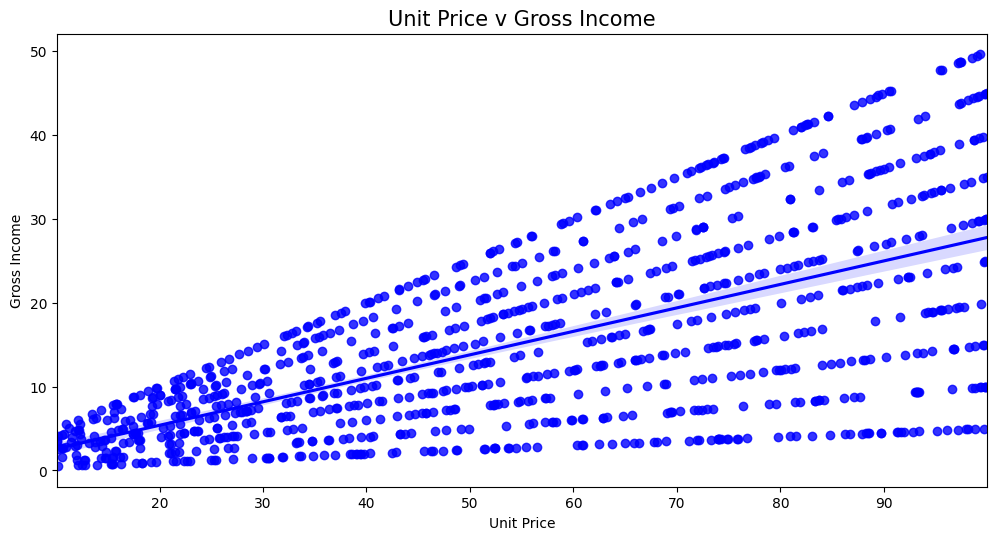

In [ ]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Unit price',y='gross income',data=df,color='blue')
plt.xlabel('Unit Price')
plt.ylabel('Gross Income')
plt.title('Unit Price v Gross Income',fontsize=15)
plt.show()

In [ ]:
numerical=['cogs','Quantity','gross income','Total']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5a4f7d150>,
      dtype=object)

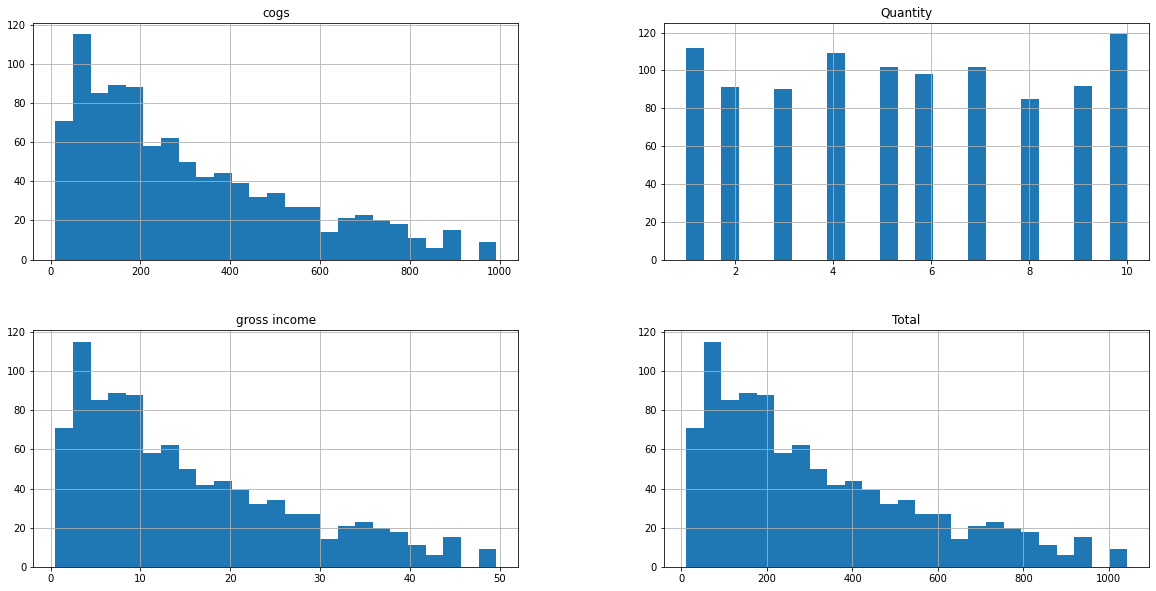

In [ ]:
df[numerical].hist(bins=25, figsize=(20,10), layout=(2, 2))

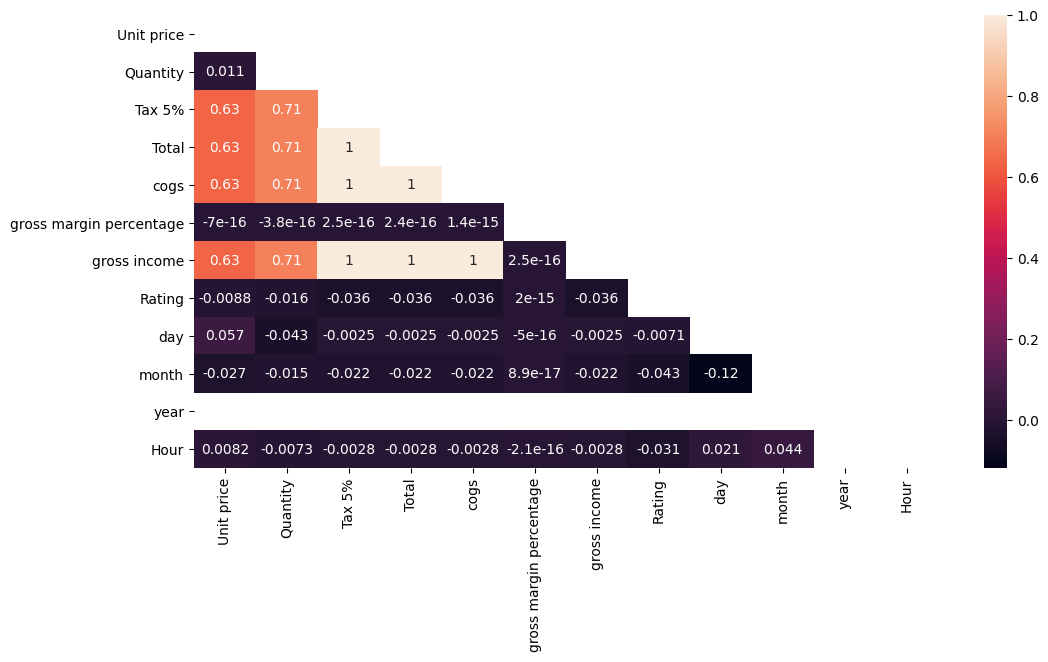

In [ ]:
matrix=np.triu(df.corr())
plt.figure(figsize=(12,6),dpi=100)
sns.heatmap(df.corr(),annot=True,mask=matrix)

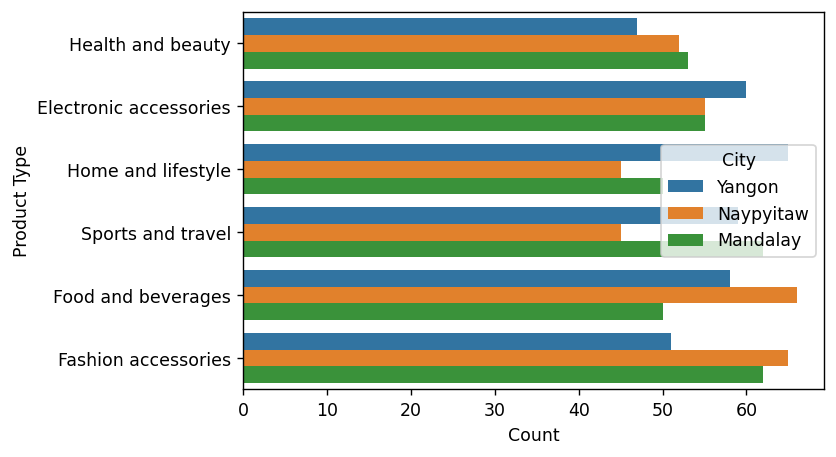

In [ ]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "City", data = df) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()


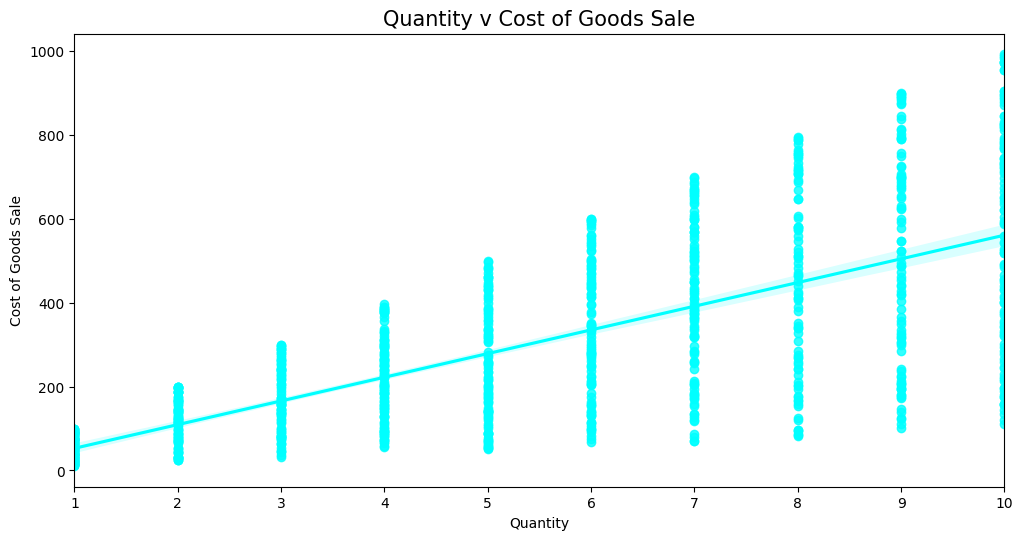

In [ ]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Quantity',y='cogs',data=df,color='cyan')
plt.xlabel('Quantity')
plt.ylabel('Cost of Goods Sale')
plt.title('Quantity v Cost of Goods Sale',fontsize=15)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x=df.iloc[:,-8].values.reshape(-1,1)

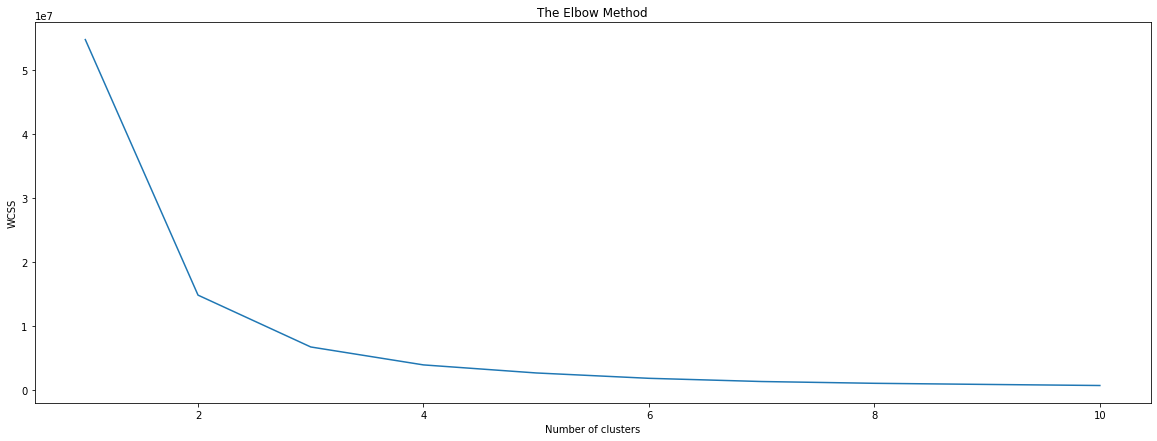

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(20,7))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Training the K-Means model on the dataset
kmeans= KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(x)

In [ ]:
plt.figure(figsize=(20,8))
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0], s = 100, c = 'red', label = 'Lower Class')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1], s = 100, c = 'blue', label = 'Upper Lower Class')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2], s = 100, c = 'green', label = 'Medium Class')
plt.scatter(x[y_kmeans == 3,0], x[y_kmeans == 3], s = 100, c = 'cyan', label = 'Upper Medium Class')
plt.scatter(x[y_kmeans == 4,0], x[y_kmeans == 4], s = 100, c = 'magenta', label = 'Upper Class5')
plt.title('Clusters of customers')
plt.xlabel('Total expenditure')
plt.ylabel('COGs earned')
plt.legend()
plt.show()

NameError: ignored

*red class is for economically lower class customers  and blue cluster is for economically stronger group of customers*

**CONCLUSION OF BUSINESS REPORT**



FINAL COMPLETE BUSINESS REPORT

The city chosen for expansion should be Naypyitaw.
Open the store in Naypyitaw with a full-backed inventory of goods in product categories - Food and Beverages, Fashion Assesories and Electronics.
The company should improve service in Electronics domain.
Increase service in cash payment modes.

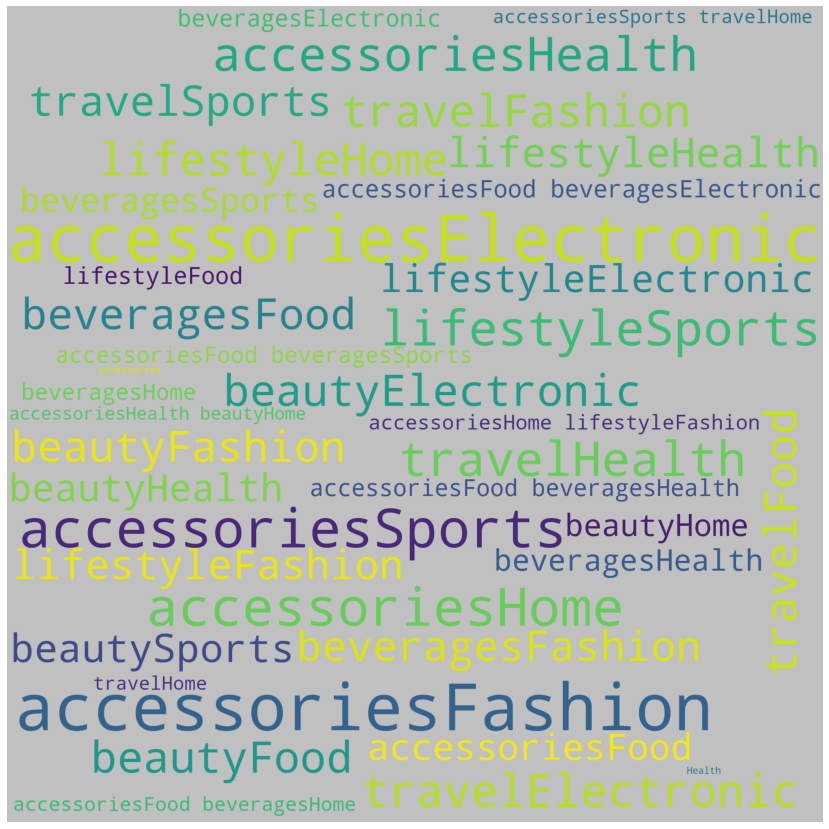

In [ ]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
        background_color='silver',
        width=2000,
        height=2000
).generate("".join(df["Product line"]))

plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('cast.png')
plt.show()